In [63]:
from itertools import chain

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import evaluation.evaluator as evaluator
from importlib import reload

reload(evaluator)

<module 'evaluation.evaluator' from '/home/alex/code/ML/ML24/exercise-1/evaluation/evaluator.py'>

In [64]:
path = "./datasets_kaggle/breast-cancer/"
train_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.lrn.csv" % path)
competition_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.tes.csv" % path)

train_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)
competition_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)

train_data.drop(columns=['ID'], inplace=True)
competition_data.drop(columns=['ID'], inplace=True)

In [65]:
train_data

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [66]:
competition_data

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [67]:
y = train_data[('class')]
X = train_data.drop('class', axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# y_comp = competition_data['grade']  # Target variable does not exist for competition data
X_comp = competition_data
print(X_train.dtypes)

radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst            float64
 concavePointsWorst        float64
 symmetryWorst      

In [68]:
print("null values in train data: " + str(X_train.isnull().sum().sum()))
print("null values in test data: " + str(X_test.isnull().sum().sum()))
print("null values in competition data: " + str(X_comp.isnull().sum().sum()))

null values in train data: 0
null values in test data: 0
null values in competition data: 0


In [69]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    #('scaler', StandardScaler())
])

pipeline_standard = Pipeline([
    ('scaler', StandardScaler())
])

X_train_std = pipeline_standard.fit_transform(X_train)
X_test_std = pipeline_standard.transform(X_test)
X_comp_std = pipeline_standard.transform(X_comp)

# Preprocess training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_comp = pipeline.transform(X_comp)

In [70]:
# Encode target variable
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Evaluation

## Neural network

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 1000, 'verbose': False}
Hyperparameter  hidden_layer_sizes  value:  (1, 1, 1)
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 165.130854ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  hidden_layer_sizes  value:  (2, 2, 2)
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 172.072411ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (3, 3, 3)
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 177.051306ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  hidden_layer_sizes  value:  (4, 4, 4)
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.986013986013986
F1:  0.986013986013986
Time: 179.489613ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (5, 5, 5)
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.954254670279011
F1:  0.9514521514521513
Time: 188.585043ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  84 |   6 |
|  1 |   1 |  52 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  hidden_layer_sizes  value:  (6, 6, 6)
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.958101574469861
F1:  0.9578690540229003
Time: 121.336222ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   4 |  49 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (7, 7, 7)
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9513312322301086
F1:  0.9511409594947421
Time: 116.473675ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  86 |   4 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (8, 8, 8)
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 140.264750ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  hidden_layer_sizes  value:  (9, 9, 9

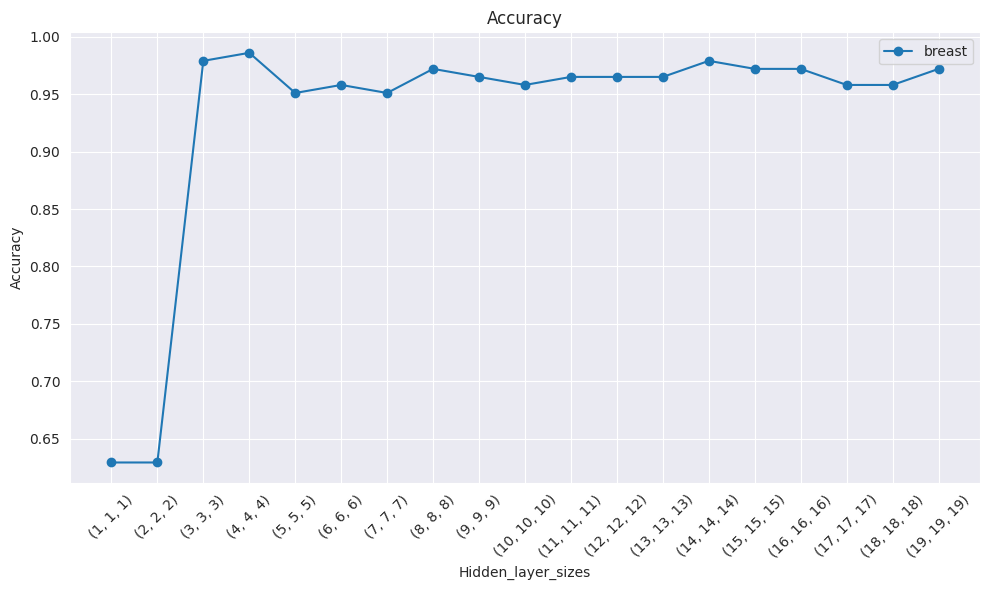

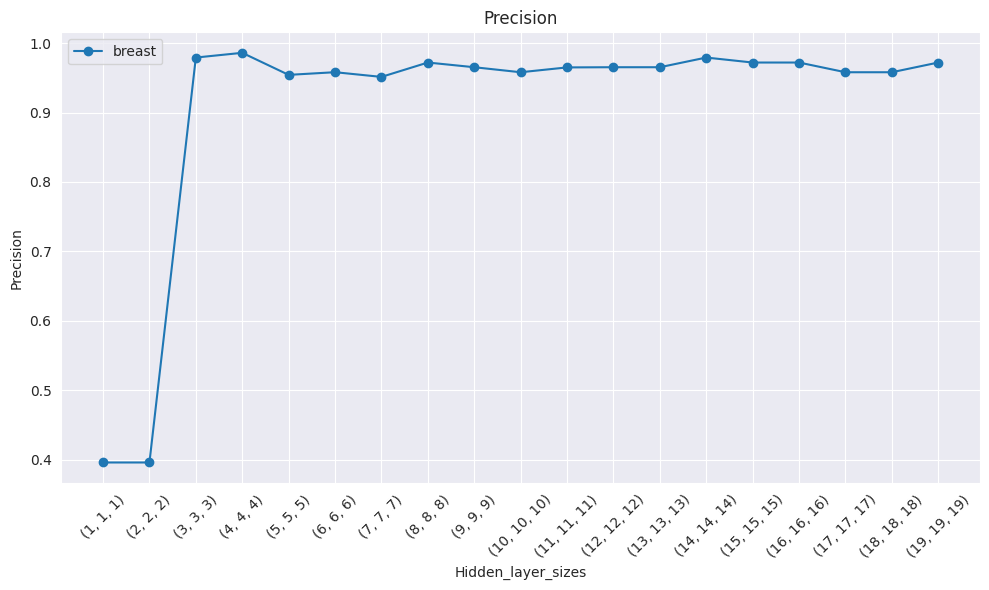

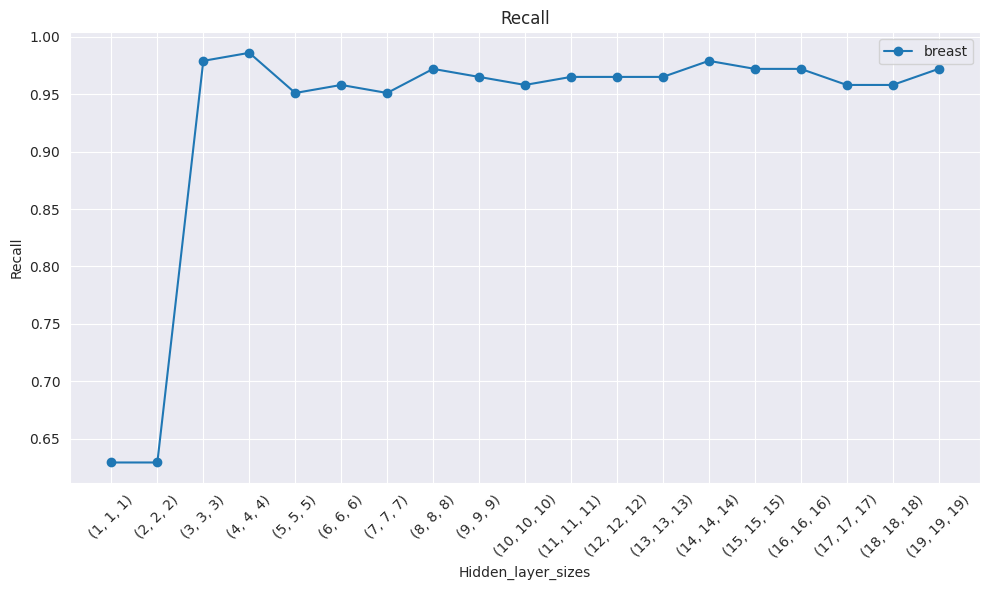

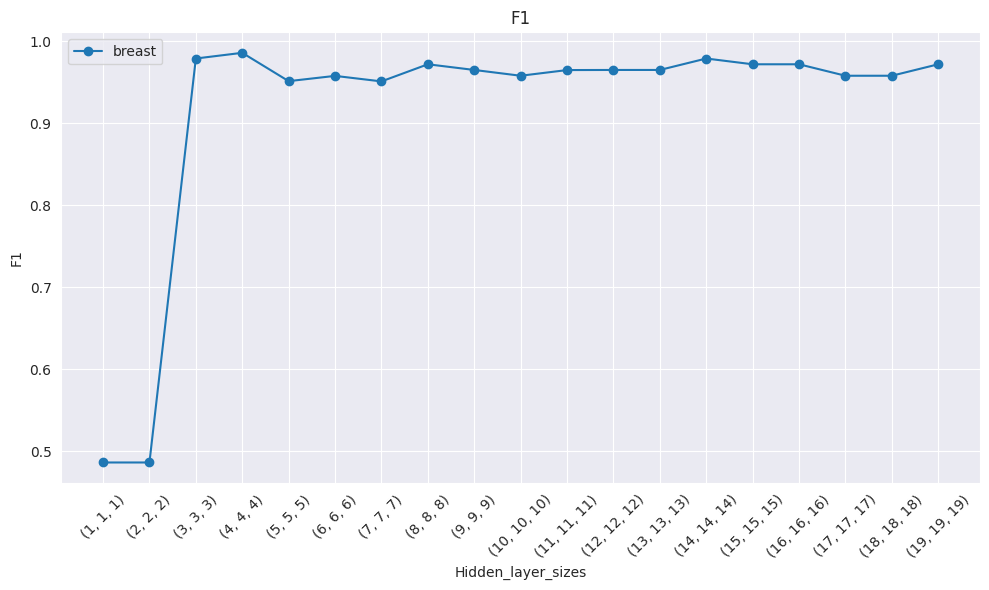

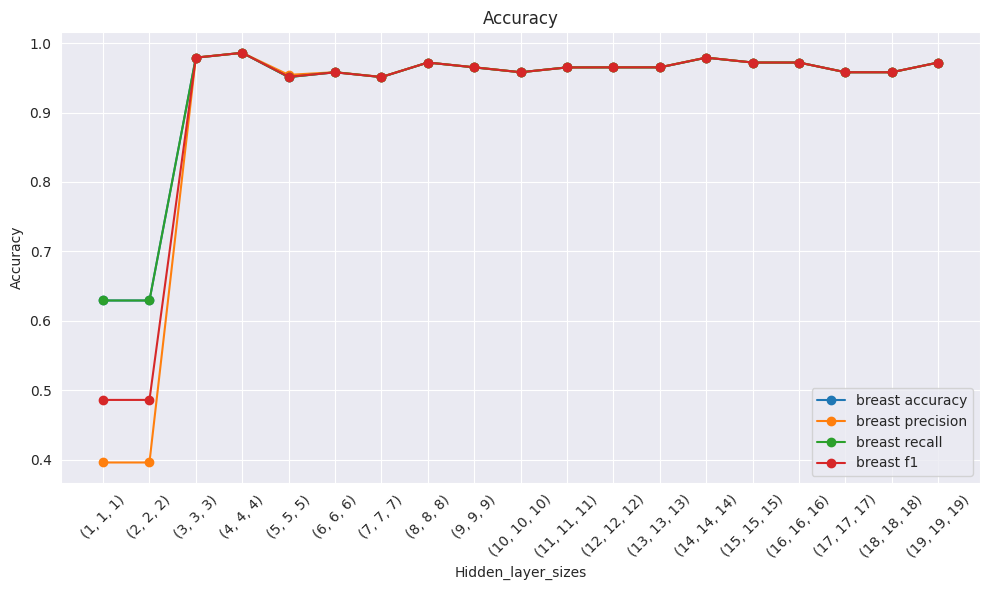

In [95]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    #'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 1000,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'hidden_layer_sizes': [(i, i, i) for i in range(1, 20, 1)]}
nn_hidden_layer = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": nn_hidden_layer}, x_axis='hidden_layer_sizes', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=False)
evaluator.draw_diagram2_list_all_in_one({"breast": nn_hidden_layer}, x_axis='hidden_layer_sizes', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=False)

In [82]:
np.logspace(-7, -2, num=50)

array([1.00000000e-07, 1.26485522e-07, 1.59985872e-07, 2.02358965e-07,
       2.55954792e-07, 3.23745754e-07, 4.09491506e-07, 5.17947468e-07,
       6.55128557e-07, 8.28642773e-07, 1.04811313e-06, 1.32571137e-06,
       1.67683294e-06, 2.12095089e-06, 2.68269580e-06, 3.39322177e-06,
       4.29193426e-06, 5.42867544e-06, 6.86648845e-06, 8.68511374e-06,
       1.09854114e-05, 1.38949549e-05, 1.75751062e-05, 2.22299648e-05,
       2.81176870e-05, 3.55648031e-05, 4.49843267e-05, 5.68986603e-05,
       7.19685673e-05, 9.10298178e-05, 1.15139540e-04, 1.45634848e-04,
       1.84206997e-04, 2.32995181e-04, 2.94705170e-04, 3.72759372e-04,
       4.71486636e-04, 5.96362332e-04, 7.54312006e-04, 9.54095476e-04,
       1.20679264e-03, 1.52641797e-03, 1.93069773e-03, 2.44205309e-03,
       3.08884360e-03, 3.90693994e-03, 4.94171336e-03, 6.25055193e-03,
       7.90604321e-03, 1.00000000e-02])

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'hidden_layer_sizes': (15, 15, 15), 'max_iter': 800, 'verbose': False}
Hyperparameter  learning_rate_init  value:  1e-06
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 4.880428ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  1.4030037231905748e-06
Accuracy:  0.3706293706293706
Recall:  0.3706293706293706
Precision:  0.13736613037312337
F1:  0.20044241472812901
Time: 5.398989ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |   0 |  90 |
|  1 |   0 |  53 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  1.9684194472866114e-06
Accuracy:  0.5104895104895105
Recall:  0.5104895104895105
Precision:  0.4985307245945544


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  2.10634454232412e-05
Accuracy:  0.3776223776223776
Recall:  0.3776223776223776
Precision:  0.7677041268590564
F1:  0.21530264607187682
Time: 204.189062ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |   1 |  89 |
|  1 |   0 |  53 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  2.9552092352028878e-05
Accuracy:  0.5034965034965035
Recall:  0.5034965034965035
Precision:  0.7108924973331753
F1:  0.4575449975907642
Time: 201.104403ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  22 |  68 |
|  1 |   3 |  50 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  4.146169559796814e-05
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.958101574469861
F1:  0.9578690540229003
Time: 200.847387ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   4 |  49 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  5.817091329374358e-05
Accuracy:  0.8951048951048951
Recall:  0.8951048951048951
Precision:  0.9051887432955393
F1:  0.8913062534991333
Time: 201.388836ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |  14 |  39 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  8.161400793251835e-05
Accuracy:  0.8741258741258742
Recall:  0.8741258741258742
Precision:  0.8951048951048951
F1:  0.8669739351557533
Time: 190.663576ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  18 |  35 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  0.00011450475699382824
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.9606643356643356
F1:  0.9574599593954431
Time: 189.272165ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   6 |  47 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  0.00016065060038537288
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9722098021330758
F1:  0.9719127026819333
Time: 229.522467ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   3 |  50 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  0.00022539339047347913
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.986013986013986
F1:  0.986013986013986
Time: 198.934078ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.00031622776601683794
Accuracy:  0.993006993006993
Recall:  0.993006993006993
Precision:  0.9930838392376855
F1:  0.9929930106725687
Time: 193.656445ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.0004436687330978611
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.979040190578652
F1:  0.9789790320177061
Time: 176.133871ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparamet

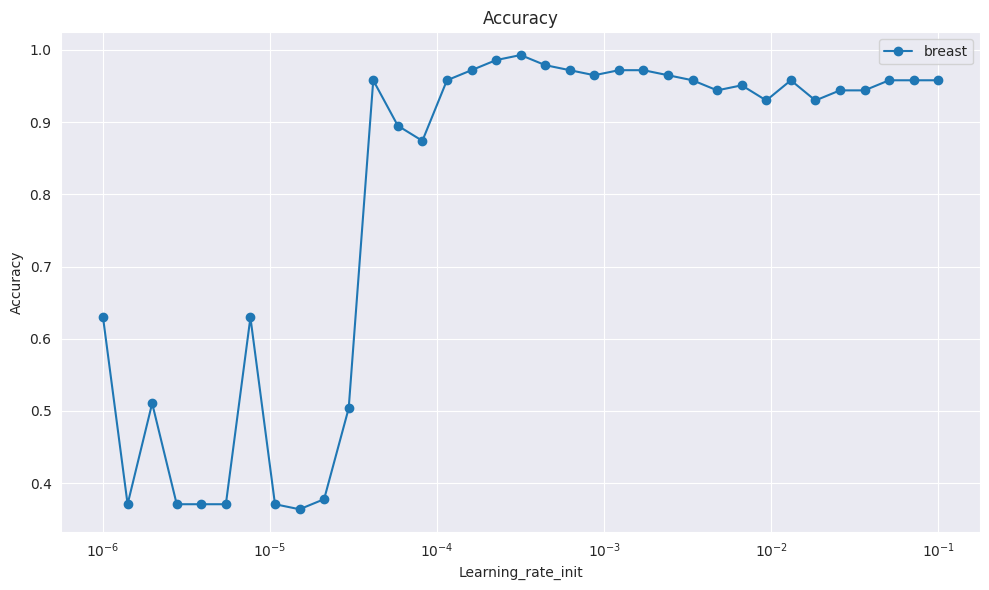

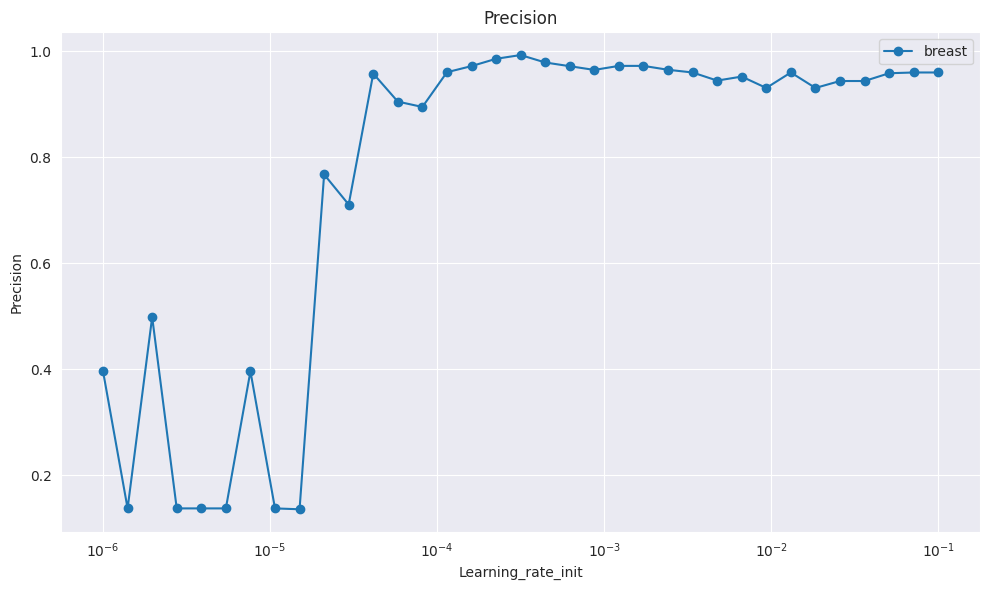

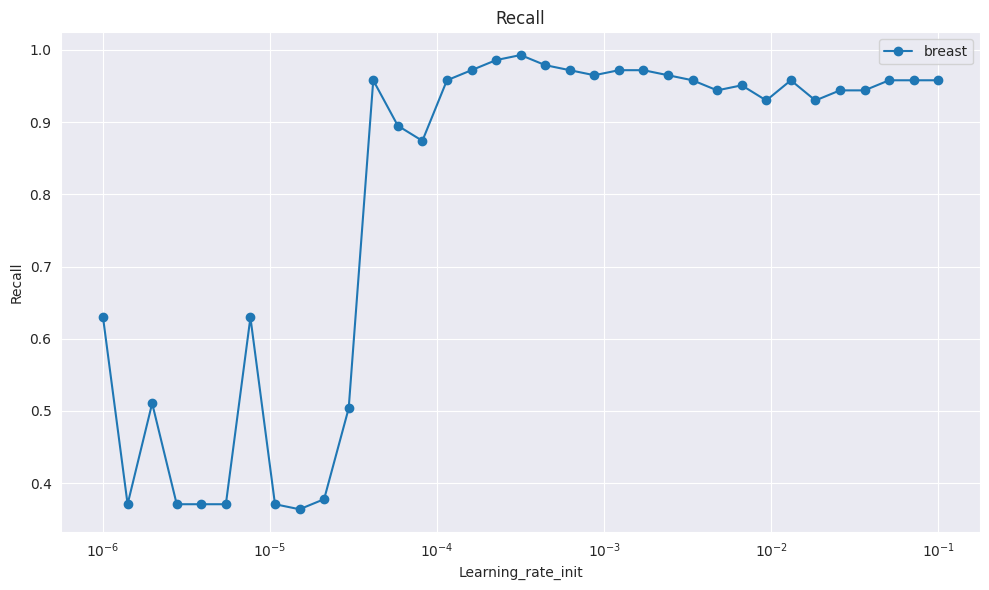

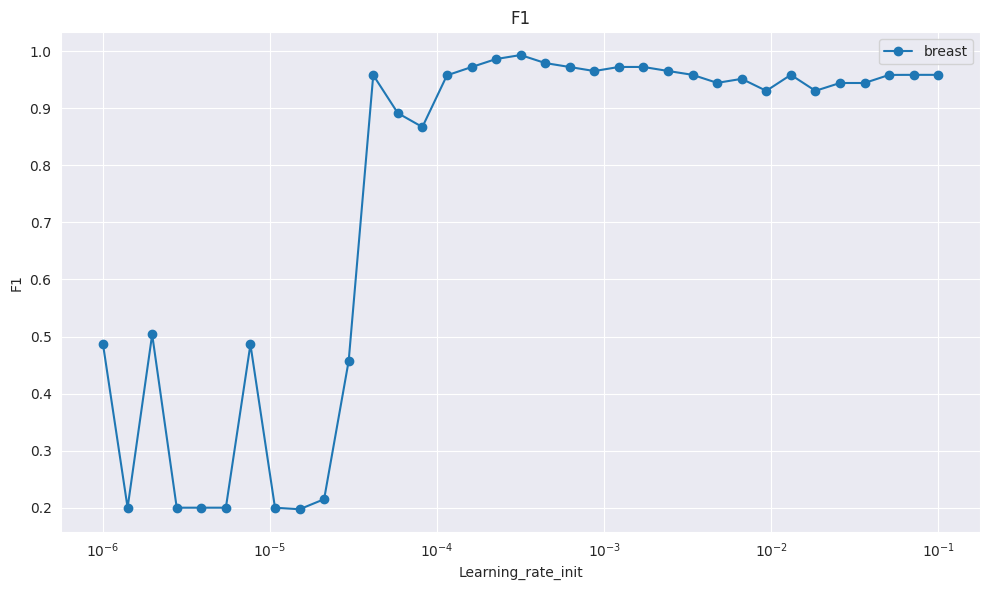

In [83]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'learning_rate_init': np.logspace(-6, -1, num=35)}
nn_learning_rate = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": nn_learning_rate}, x_axis='learning_rate_init', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=True)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (15, 15, 15), 'verbose': False}
Hyperparameter  max_iter  value:  50
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 14.096260ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  max_iter  value:  100
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9796977216332055
F1:  0.9788874184863361
Time: 26.446581ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  max_iter  value:  150
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.9863180297962907
F1:  0.9859563513409668
Time: 37.427187ms
Confusion Matrix: 


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

Hyperparameter  max_iter  value:  300
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.986013986013986
F1:  0.986013986013986
Time: 81.000090ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  max_iter  value:  350
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.979040190578652
F1:  0.9789790320177061
Time: 90.789795ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  max_iter  value:  400
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 101.984024ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  max_iter  value:  450
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Pr

/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  max_iter  value:  550
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 137.049675ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  max_iter  value:  600
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 100.977182ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  max_iter  value:  650
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 109.421015ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  max_iter  value:  700
Accuracy:  0.965034965034965
Recall:  0.9650349650349

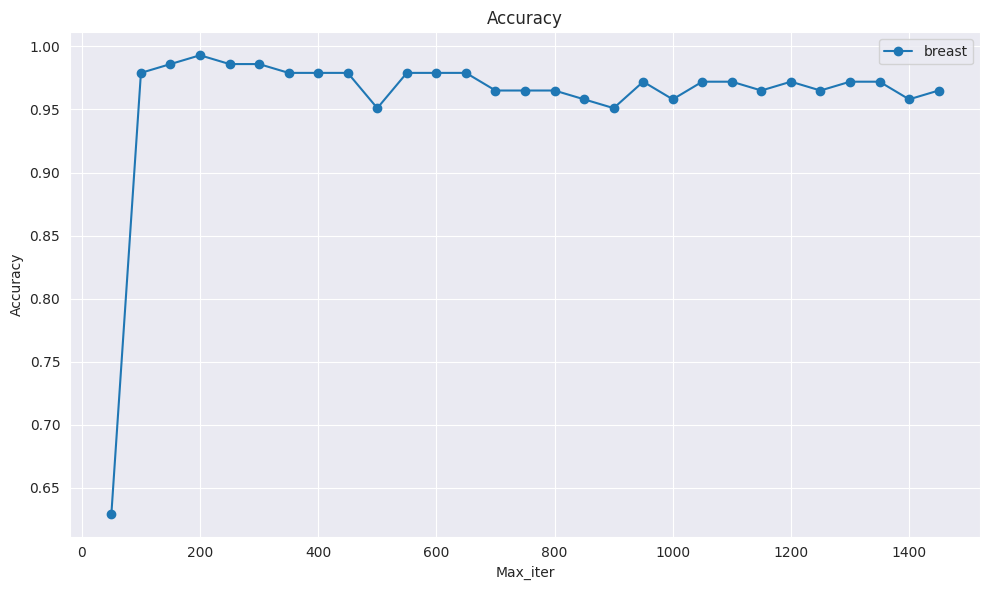

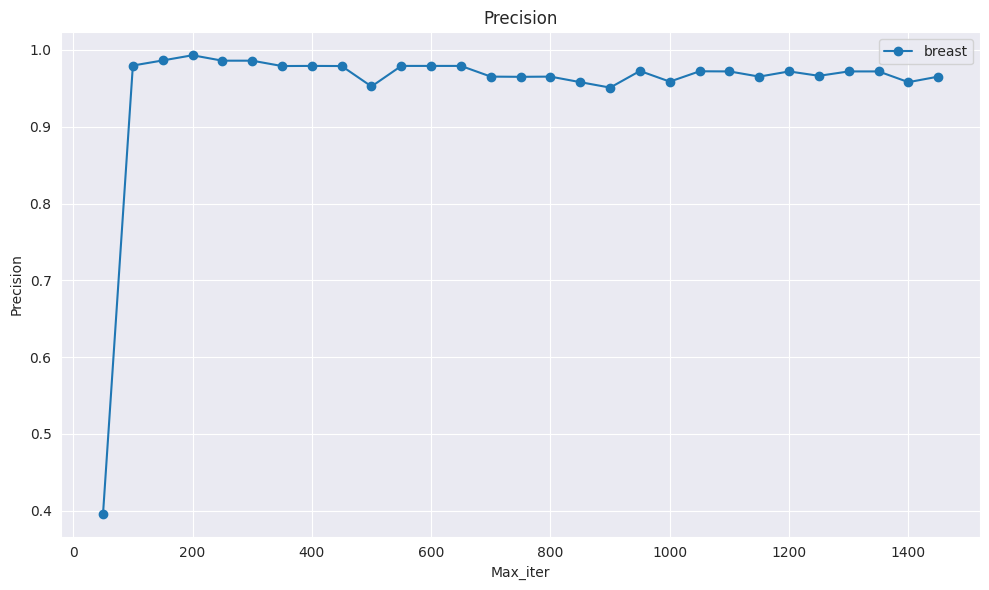

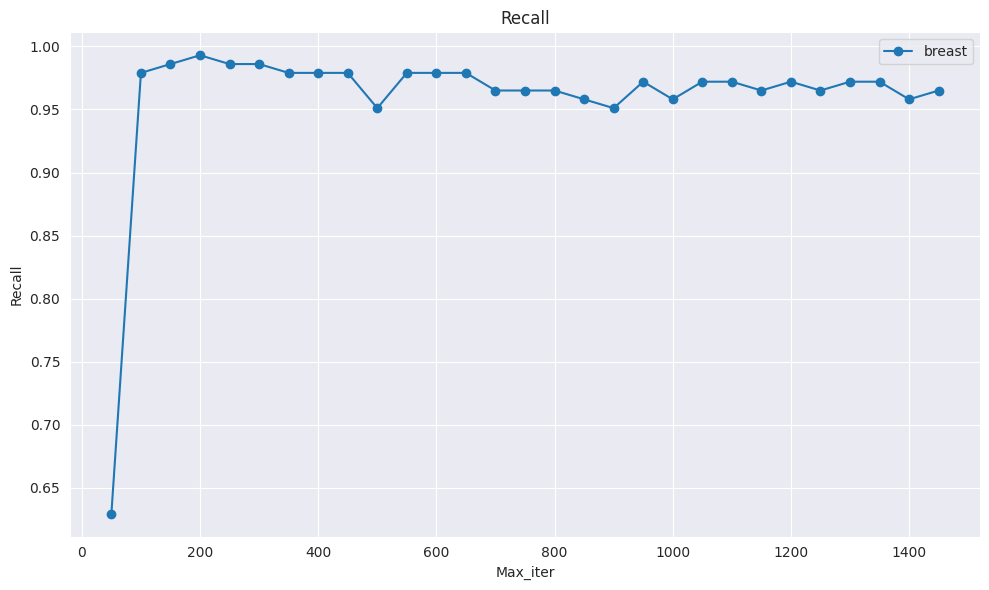

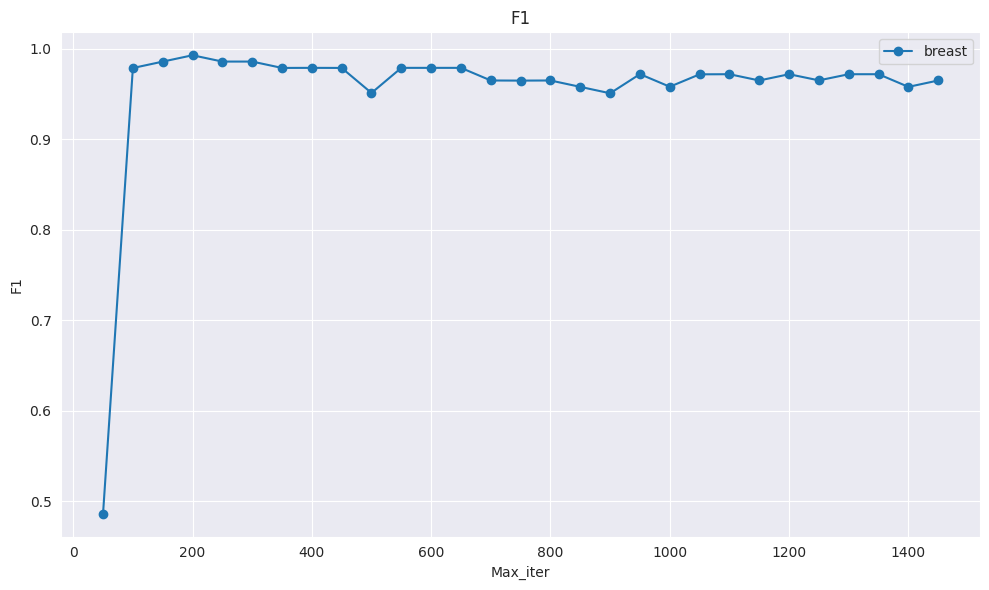

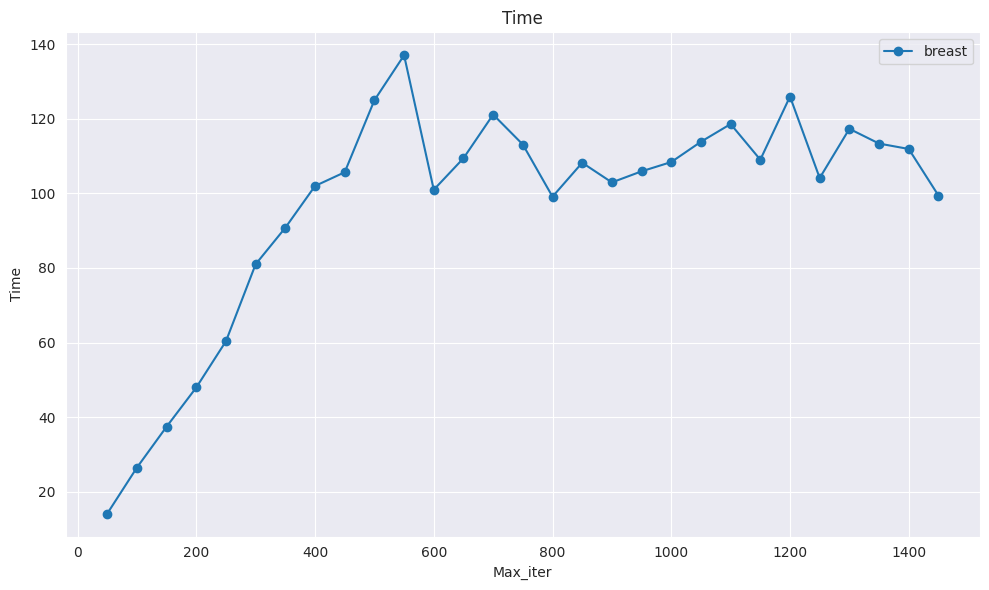

In [84]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    #'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'max_iter': range(50, 1500, 50)}
nn_max_iter = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": nn_max_iter}, x_axis='max_iter', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (15, 15, 15), 'max_iter': 1000, 'verbose': False}
Hyperparameter  activation  value:  identity
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9726319135410045
F1:  0.9721298260624104
Time: 104.841232ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   1 |  52 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  activation  value:  logistic
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.986013986013986
F1:  0.986013986013986
Time: 266.350031ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  activation  value:  tanh
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 124.301434ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  activation  value:  relu
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 95.781803ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'learning_rate':

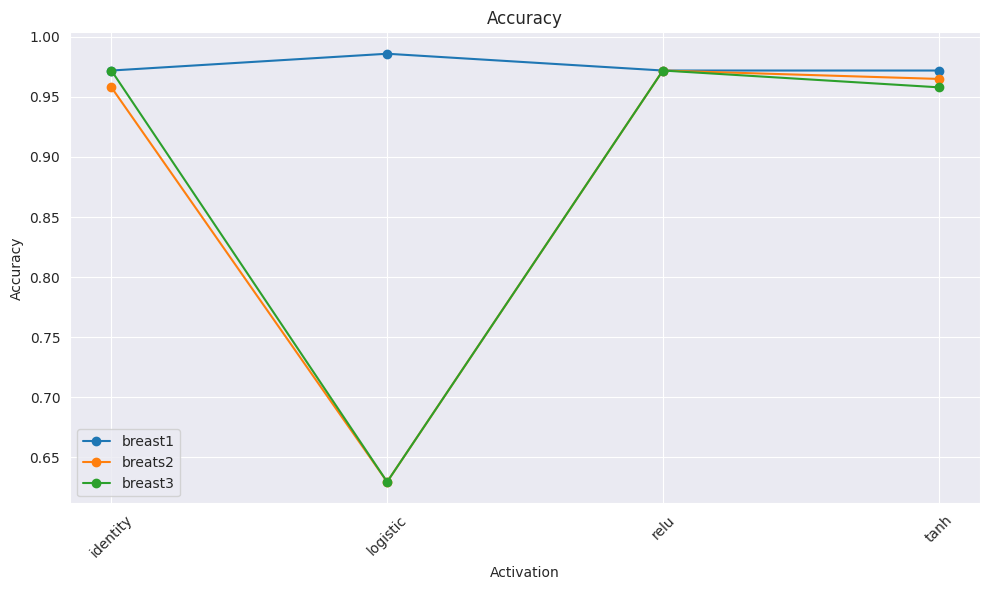

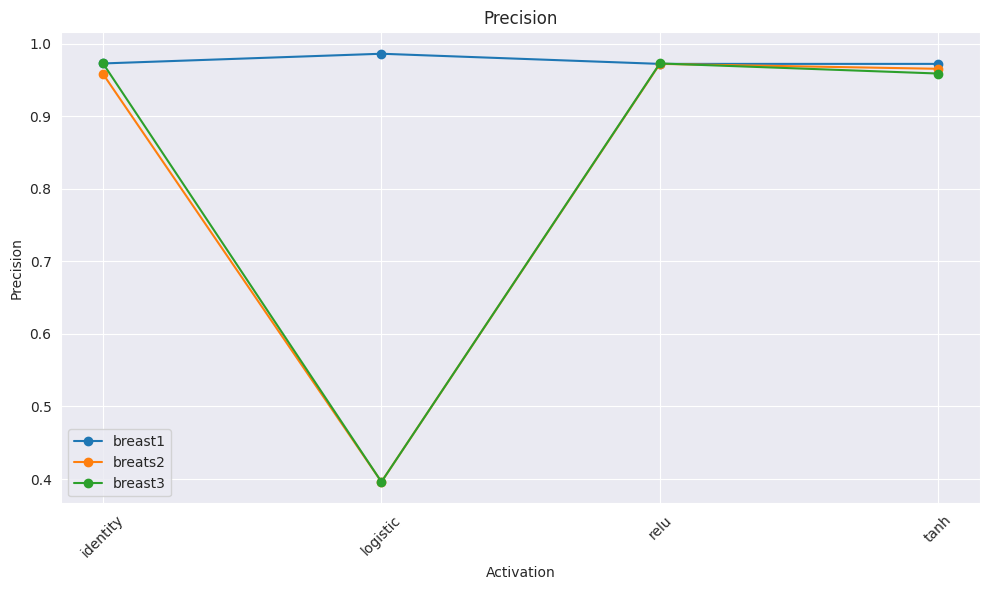

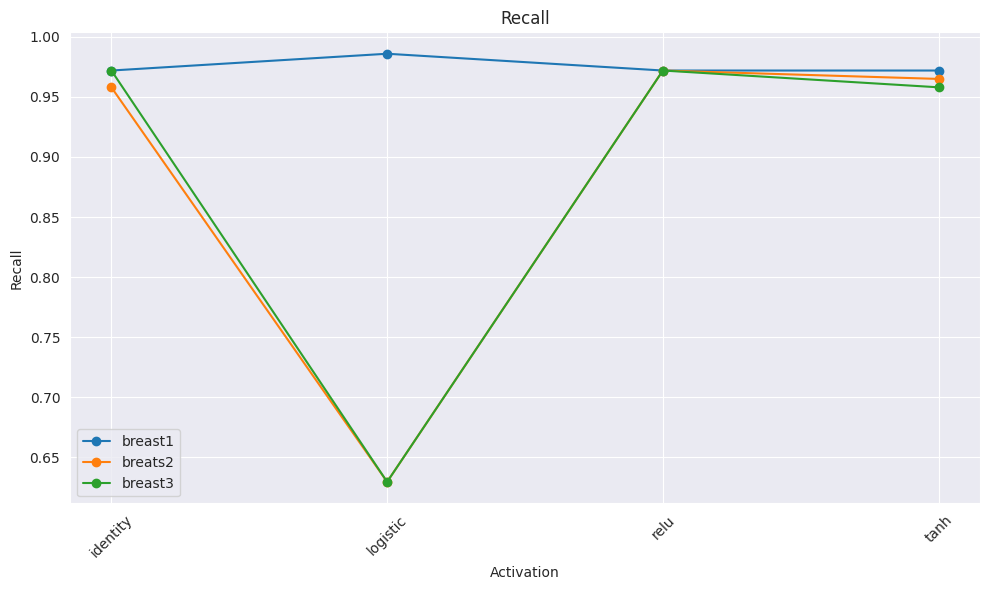

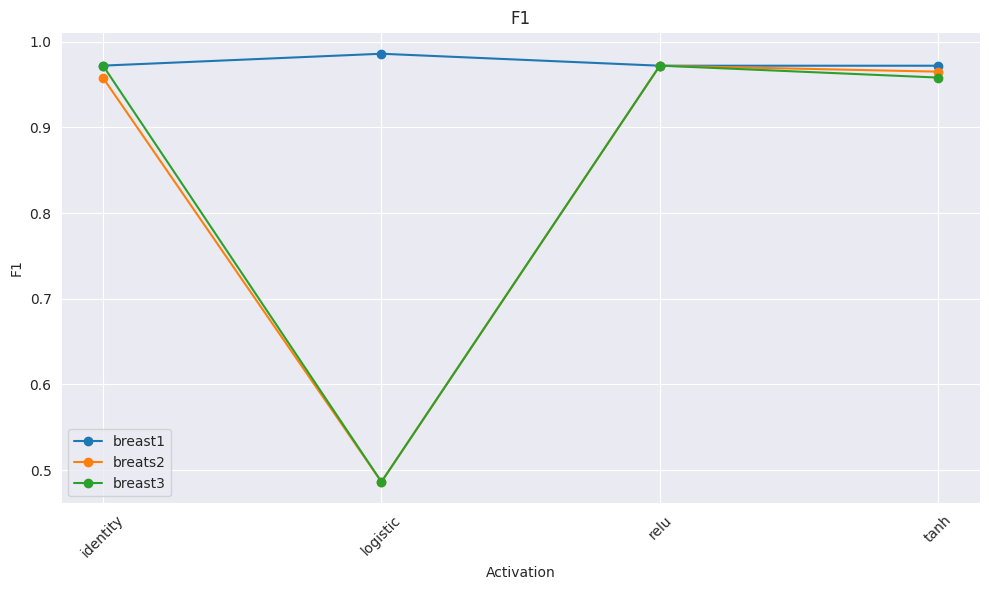

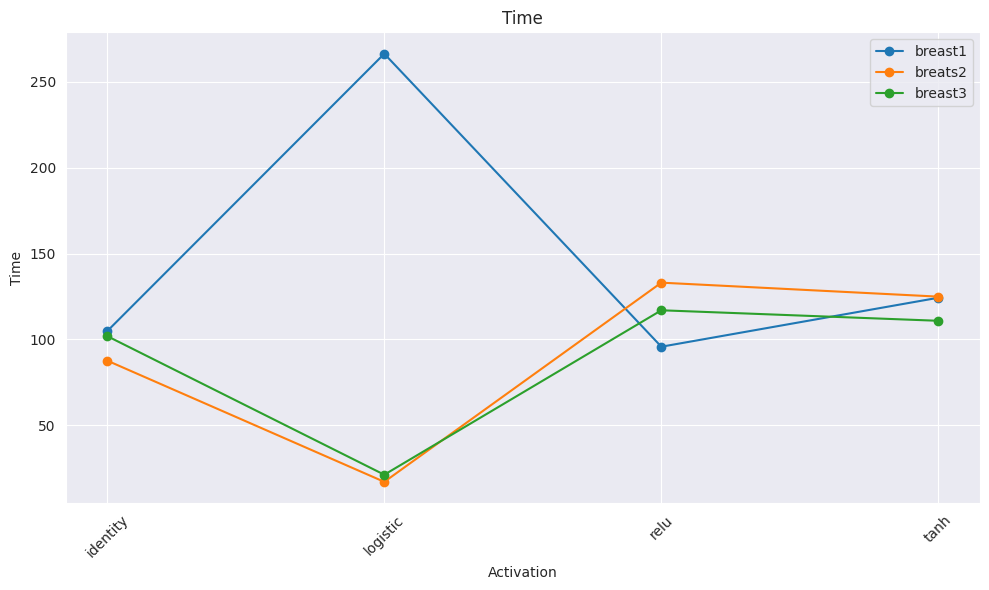

In [85]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    #'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 1000,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'activation': ['identity', 'logistic', 'tanh', 'relu']}
act_function1 = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
act_function2 = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
act_function3 = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast1": act_function1, "breats2": act_function2, "breast3": act_function3}, x_axis='activation', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

# Random forrest

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'criterion': 'gini', 'verbose': False}
Hyperparameter  n_estimators  value:  1
Accuracy:  0.9440559440559441
Recall:  0.9440559440559441
Precision:  0.9439933468066459
F1:  0.9438254053638668
Time: 1.843214ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   5 |  48 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  2
Accuracy:  0.9090909090909091
Recall:  0.9090909090909091
Precision:  0.9163987827354163
F1:  0.9064455522432927
Time: 1.747847ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |  12 |  41 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  3
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9509528932605856
F1:  0.9509510747079808
Time: 2.435684ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   4 |  49 |
+----+-

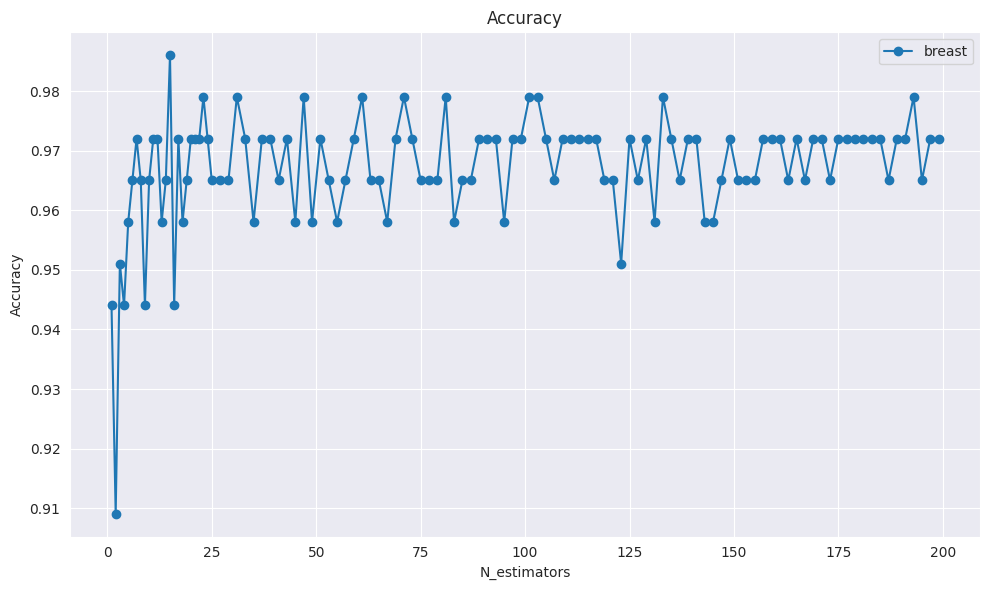

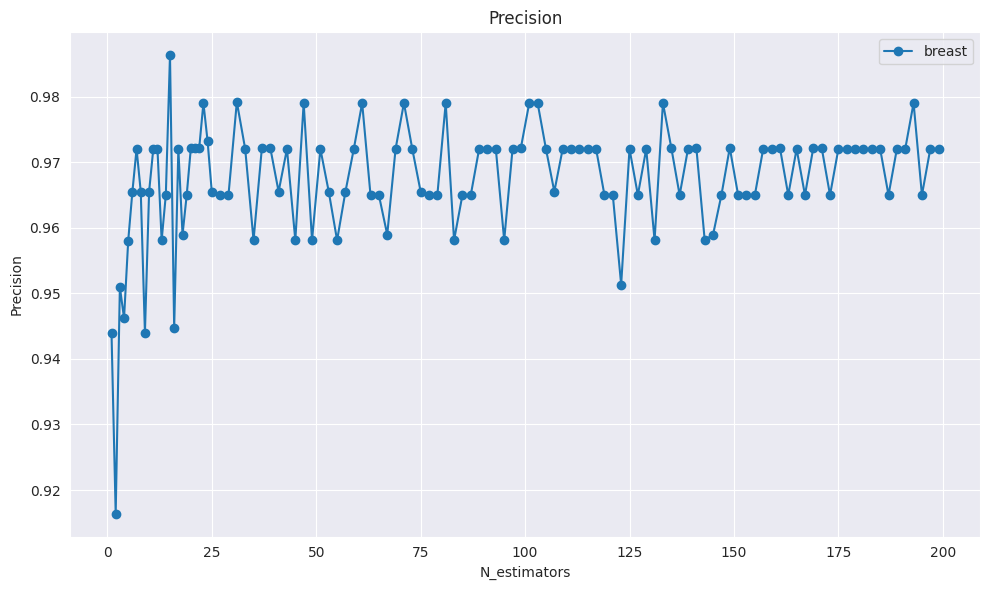

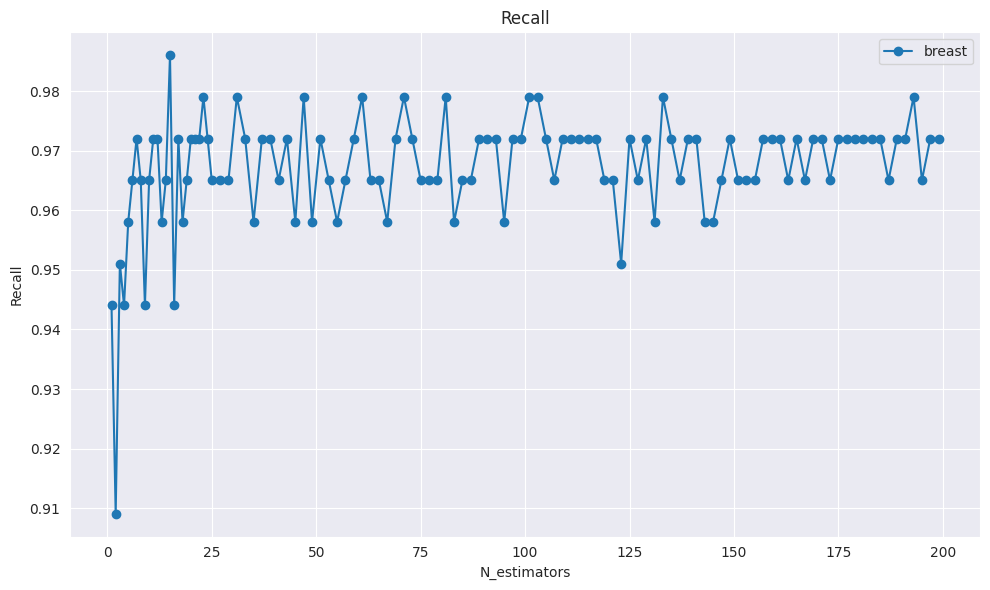

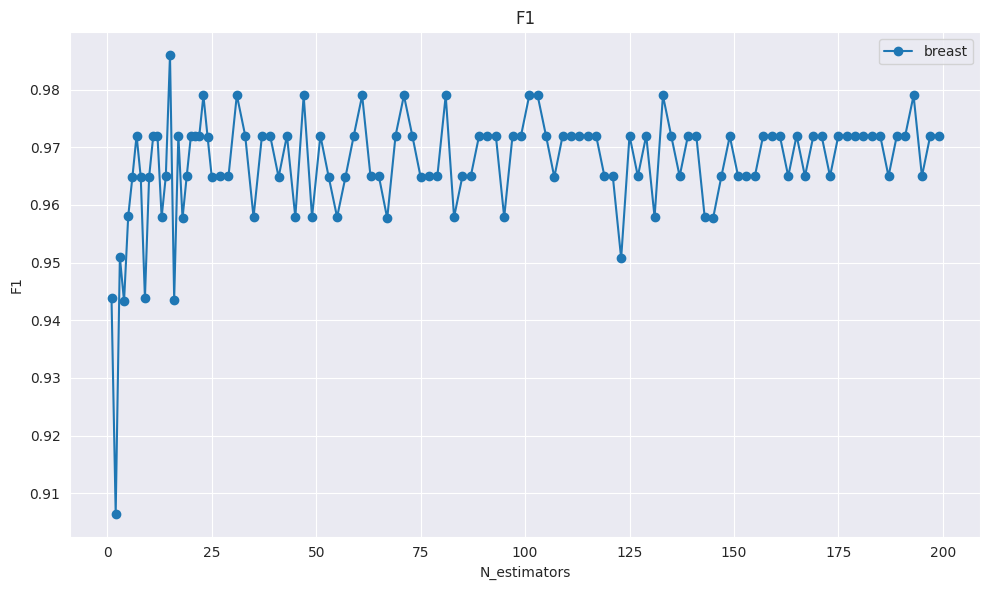

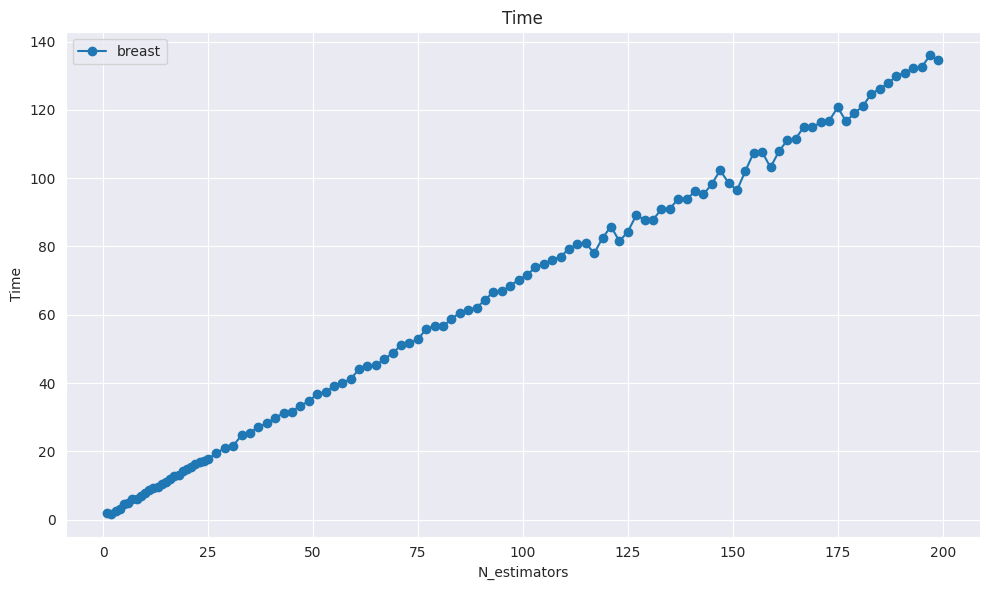

In [86]:
hyperparameters = {
    #'n_estimators': 100,
    'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'n_estimators': chain(range(1, 25, 1), range(25, 200, 2))}
rf_n_estimators = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": rf_n_estimators}, x_axis='n_estimators', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'n_estimators': 5, 'verbose': False}
Hyperparameter  criterion  value:  gini
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9655177080983532
F1:  0.9648123641438936
Time: 4.250050ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   4 |  49 |
+----+-----+-----+
Hyperparameter  criterion  value:  entropy
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9513376945635011
F1:  0.9507373098014511
Time: 3.461123ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   5 |  48 |
+----+-----+-----+
Hyperparameter  criterion  value:  log_loss
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 3.743649ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   3 |  50 |
+----+

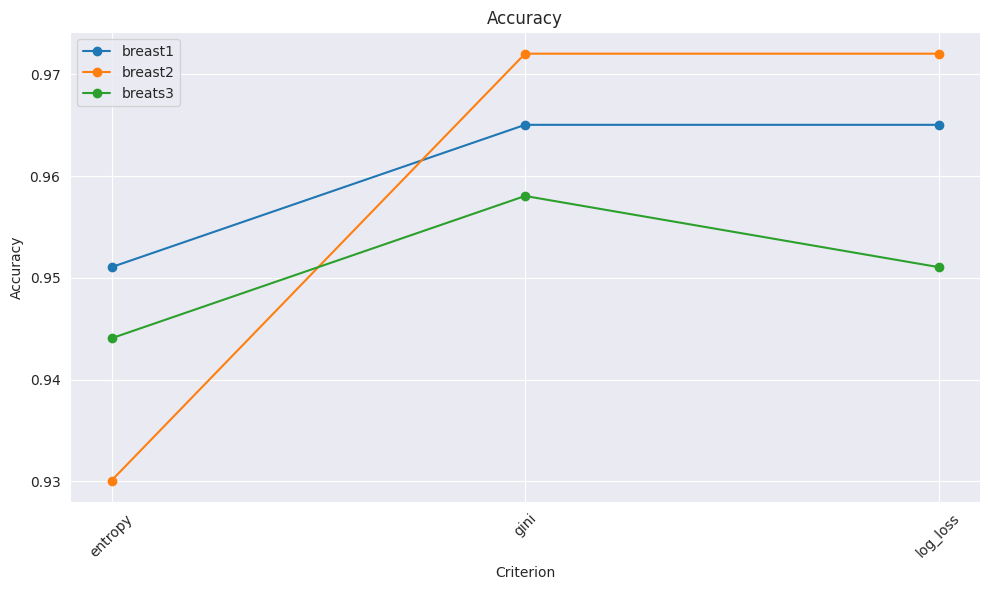

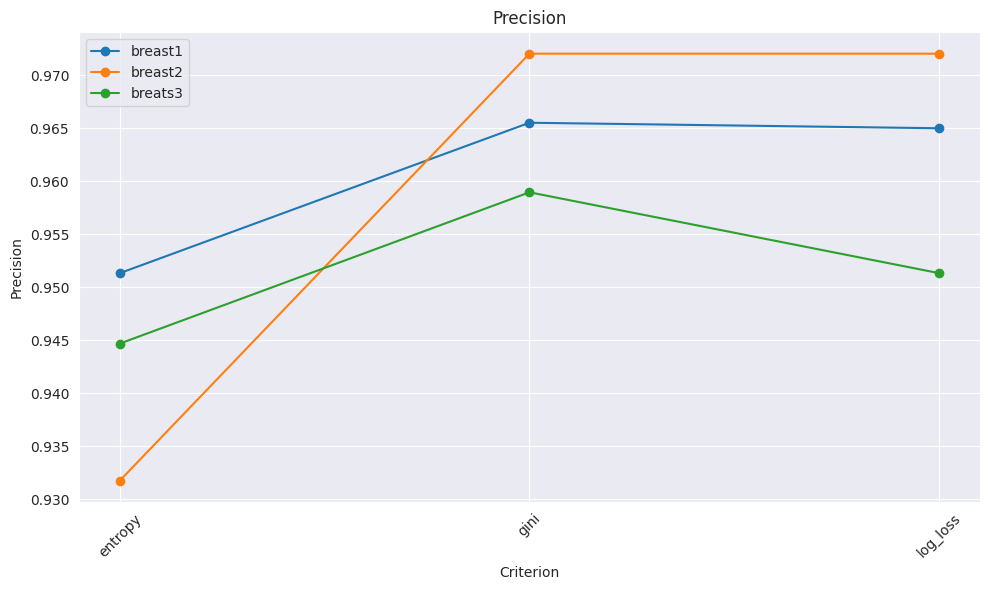

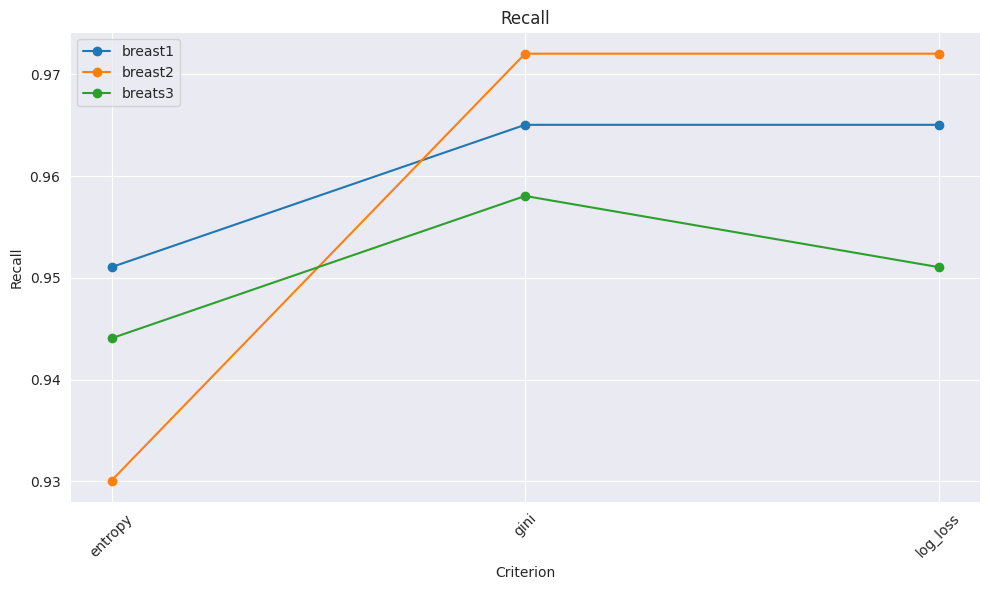

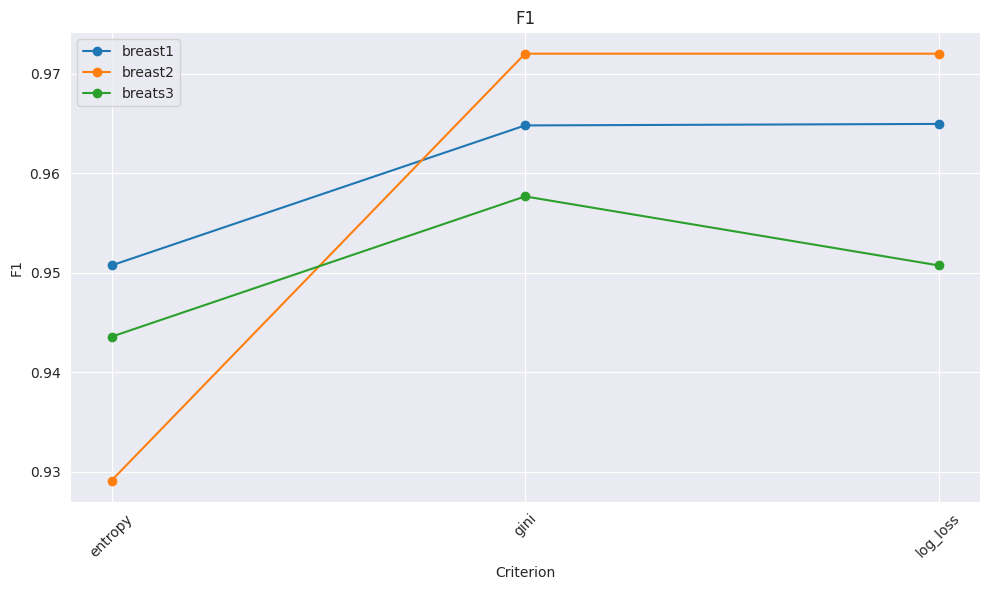

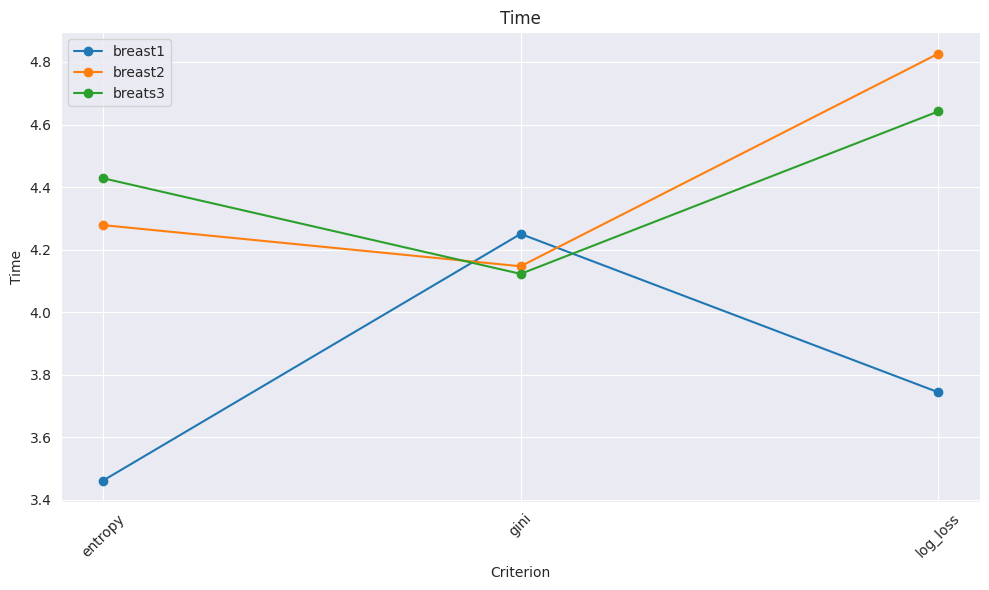

In [87]:
reload(evaluator)
hyperparameters = {
    'n_estimators': 5,
    #'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'criterion': ['gini', 'entropy', 'log_loss']}
rf_criterion = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
rf_criterion2 = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
rf_criterion3 = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast1": rf_criterion, "breast2": rf_criterion2, "breats3": rf_criterion3}, x_axis='criterion', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

In [88]:
# Bayesian

Classifier GaussianNB
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9722098021330758
F1:  0.9719127026819333
Time: 0.624895ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   3 |  50 |
+----+-----+-----+
Classifier MultinomialNB
Accuracy:  0.8111888111888111
Recall:  0.8111888111888111
Precision:  0.8547606239913933
F1:  0.7912373812208704
Time: 0.496387ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  27 |  26 |
+----+-----+-----+
Classifier BernoulliNB
Accuracy:  0.6223776223776224
Recall:  0.6223776223776224
Precision:  0.39446469023933817
F1:  0.48287918977574146
Time: 0.504017ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |  53 |   0 |
+----+-----+-----+


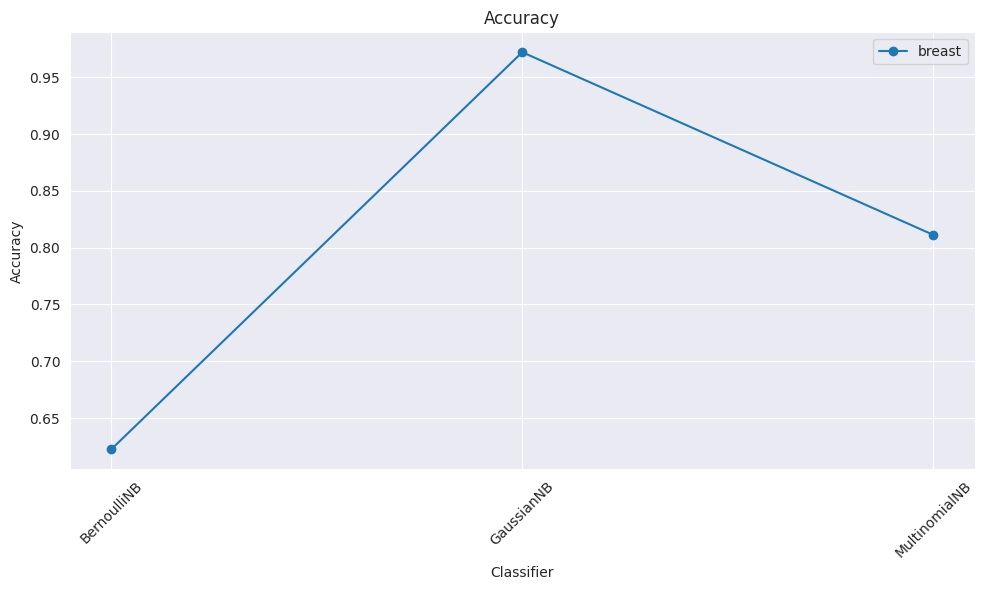

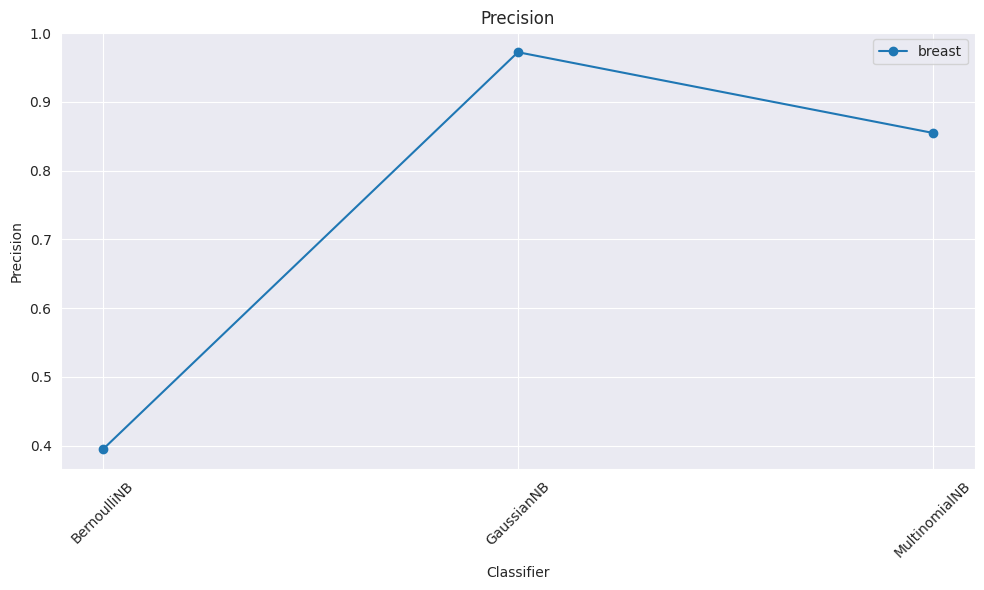

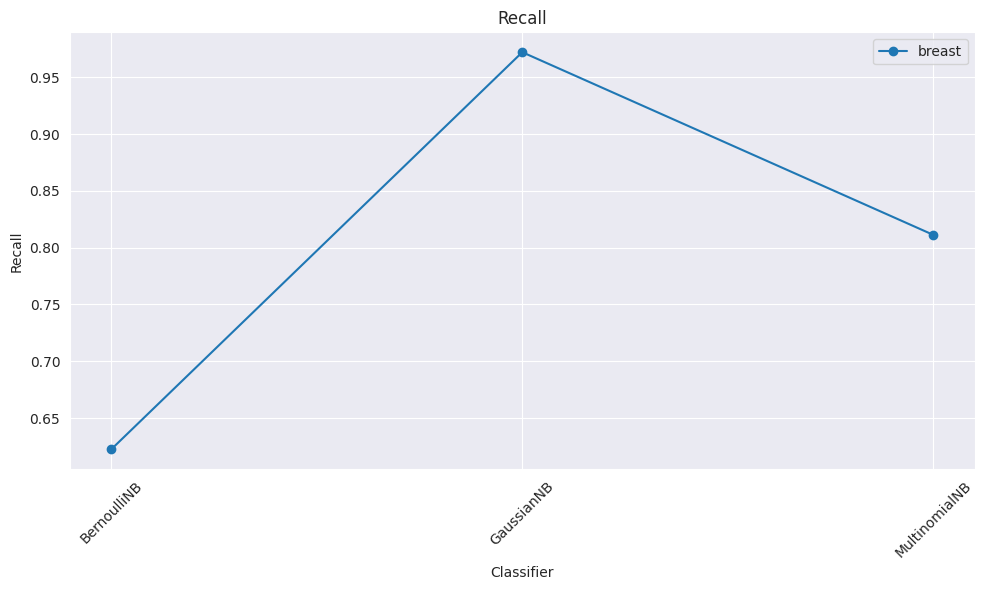

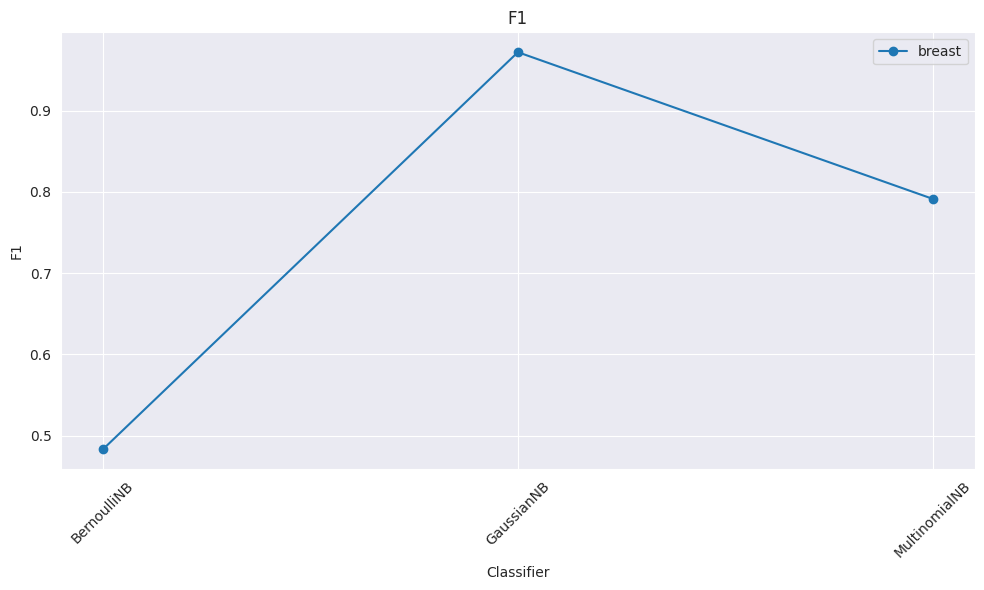

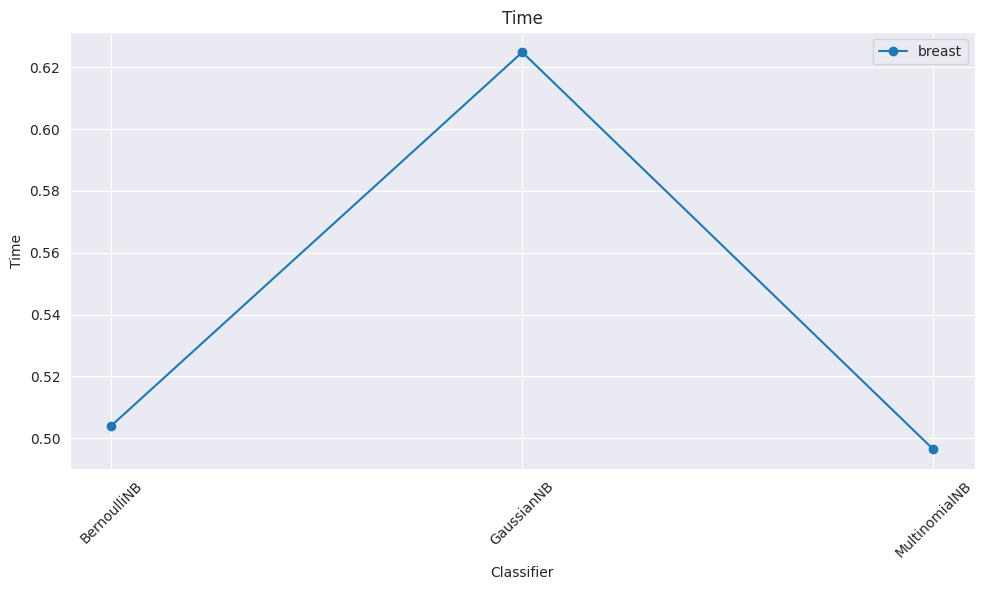

In [89]:
reload(evaluator)

classifiers = [GaussianNB, MultinomialNB, BernoulliNB]
names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']

bayes_results=evaluator.evaluate_classifier(classifiers, X_train, y_train, X_test, y_test, hyperparameters=[{},{},{},], names=names)
evaluator.draw_diagram2_list({"breast": bayes_results}, x_axis='classifier', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

# evaluate scalers

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (15, 15, 15), 'max_iter': 1000, 'verbose': False}
Classifier MinMaxScaler
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.958101574469861
F1:  0.9578690540229003
Time: 117.499828ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   4 |  49 |
+----+-----+-----+
Classifier StandardScaler
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 89.920044ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+


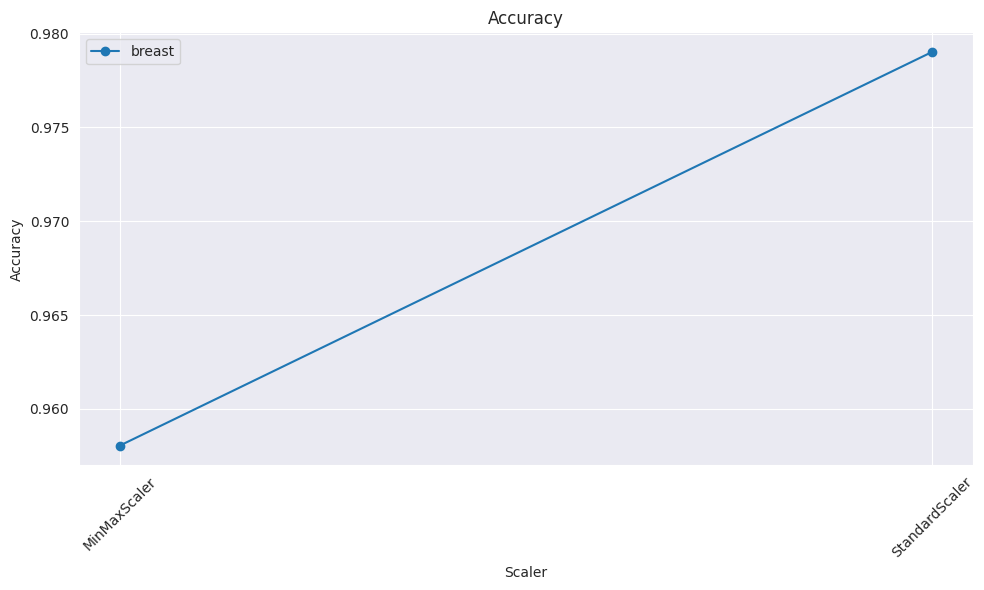

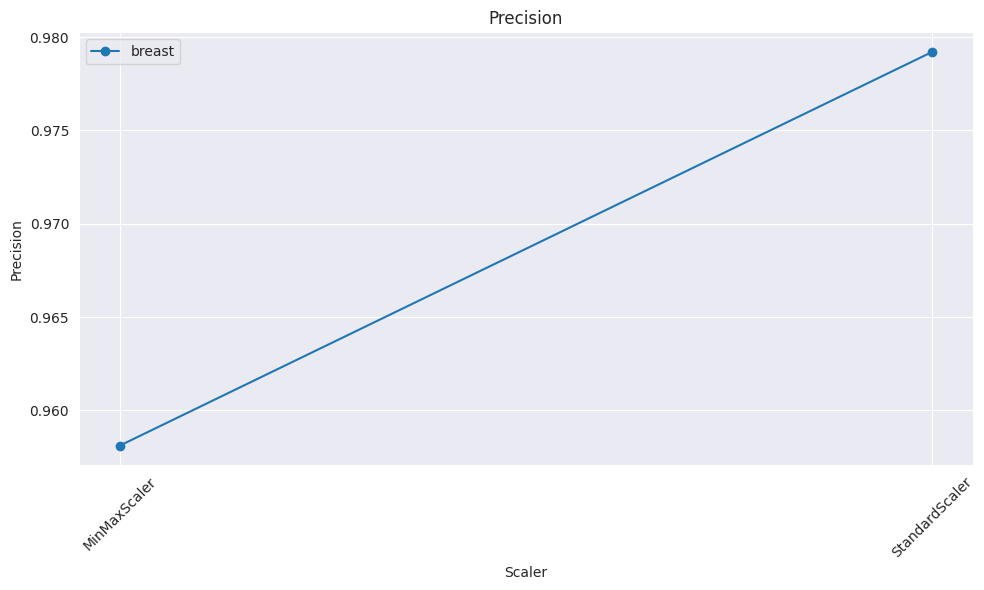

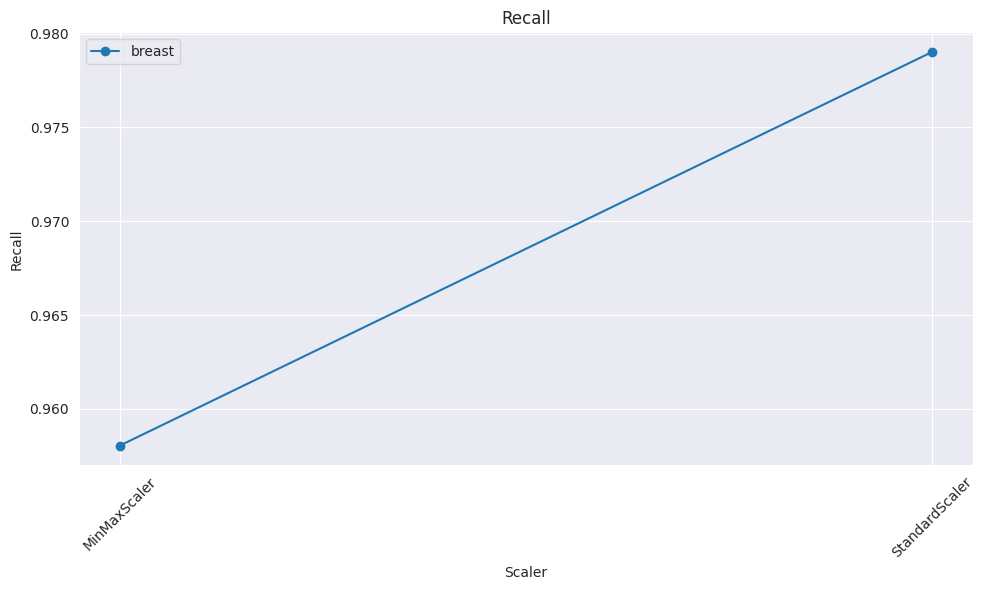

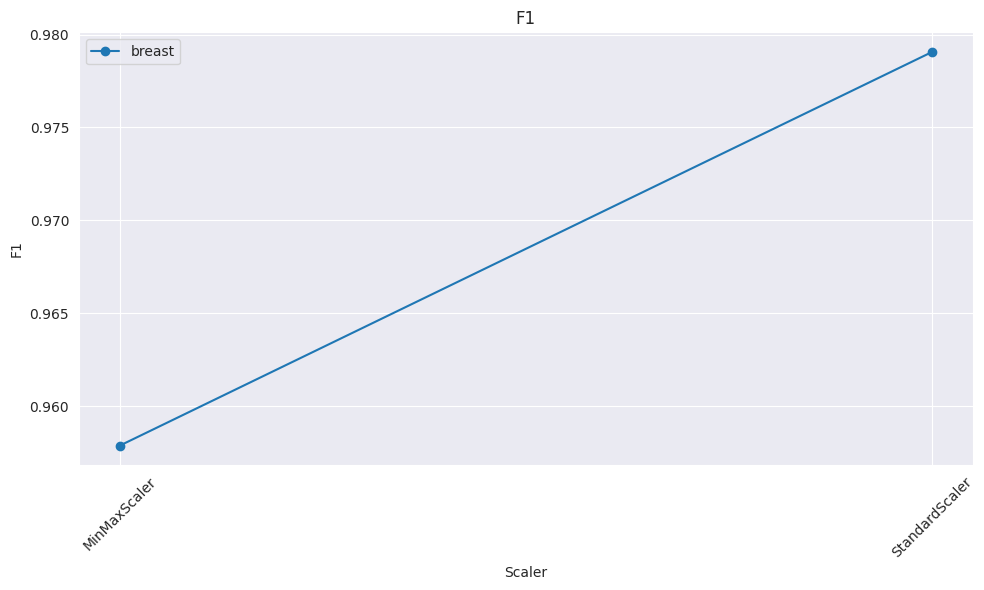

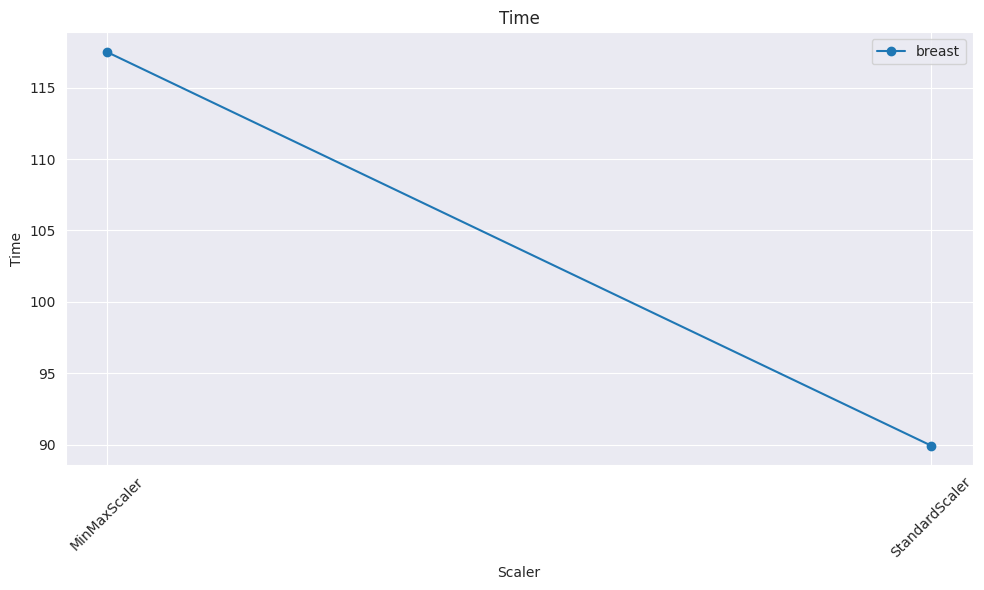

In [90]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 1000,
    'verbose': False,
    #'tol': 5e-5
}

scaler_result=evaluator.evaluate_scaler(MLPClassifier, X_train=[X_train, X_train_std], y_train=[y_train, y_train], X_test=[X_test, X_test_std], y_test=[y_test, y_test], hyperparameters=hyperparameters, names=['MinMaxScaler', 'StandardScaler'])
evaluator.draw_diagram2_list({"breast": scaler_result}, x_axis='scaler', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

In [93]:
combined_results_breast = {
    # NN
    'nn_learning_rate': nn_learning_rate,
    'nn_max_iter': nn_max_iter,
    'nn_hidden_layer': nn_hidden_layer,
    'act_function': act_function1,
    # RF
    'rf_n_estimators': rf_n_estimators,
    'rf_criterion': rf_criterion,
    # Bayes
    'bayes_results': bayes_results,
    'scaler_result': scaler_result
}
import pickle
with open('breast_results.pkl', 'wb') as f:
    pickle.dump(combined_results_breast, f)